In [ ]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as skl

In [ ]:
#importing the dataset
dataset=pd.read_csv('/content/placement.csv')
print(dataset)

    Unnamed: 0  cgpa     iq  placement
0            0   6.8  123.0          1
1            1   5.9  106.0          0
2            2   5.3  121.0          0
3            3   7.4  132.0          1
4            4   5.8  142.0          0
..         ...   ...    ...        ...
95          95   4.3  200.0          0
96          96   4.4   42.0          0
97          97   6.7  182.0          1
98          98   6.3  103.0          1
99          99   6.2  113.0          1

[100 rows x 4 columns]


In [ ]:
dataset.head(10)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
5,5,7.1,48.0,1
6,6,5.7,143.0,0
7,7,5.0,63.0,0
8,8,6.1,156.0,0
9,9,5.1,66.0,0


In [ ]:
dataset.describe()

,Unnamed: 0,cgpa,iq,placement
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.075000,101.500000,0.000000
50%,49.500000,6.000000,127.500000,0.500000
75%,74.250000,6.900000,149.000000,1.000000
max,99.000000,8.500000,233.000000,1.000000


In [ ]:
dataset.dtypes

Unnamed: 0      int64
cgpa          float64
iq            float64
placement       int64
dtype: object

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.drop_duplicates(inplace=True)

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

In [ ]:
# Fill null values with mean
dataset.fillna(dataset.mean(), inplace=True)

# Display the merged DataFrame
print(dataset)

    Unnamed: 0  cgpa     iq  placement
0            0   6.8  123.0          1
1            1   5.9  106.0          0
2            2   5.3  121.0          0
3            3   7.4  132.0          1
4            4   5.8  142.0          0
..         ...   ...    ...        ...
95          95   4.3  200.0          0
96          96   4.4   42.0          0
97          97   6.7  182.0          1
98          98   6.3  103.0          1
99          99   6.2  113.0          1

[100 rows x 4 columns]


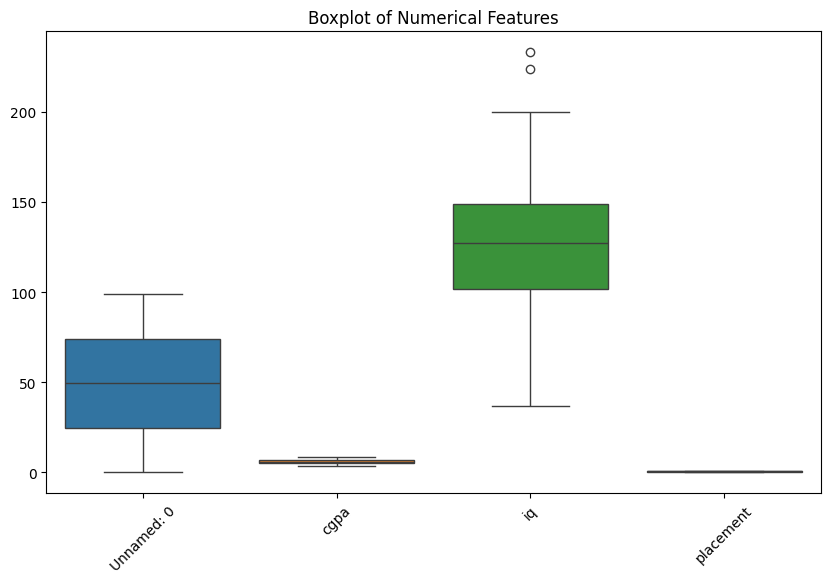

In [ ]:
# Visualize outliers with boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Handle outliers
from scipy.stats import zscore

z_scores = zscore(dataset.select_dtypes(include=['float64', 'int64']))
abs_z_scores = abs(z_scores)
threshold = 3
outliers_mask = (abs_z_scores > threshold).any(axis=1)
merged_df = dataset[~outliers_mask]

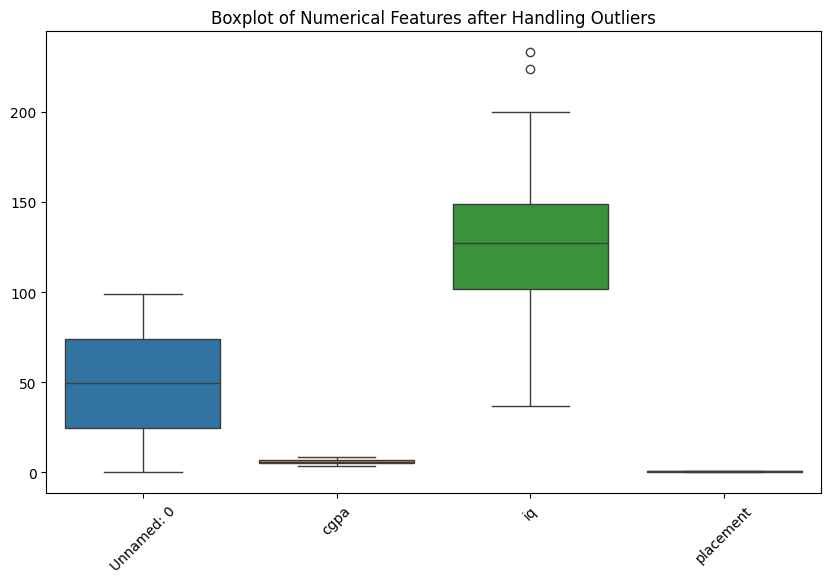

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers with boxplot after handling
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot of Numerical Features after Handling Outliers')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#feature and target variable
X = dataset['cgpa'].values[:, np.newaxis]
y = dataset['iq'].values

In [ ]:
# Data preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled, y)


LinearRegression()

In [ ]:
corr=dataset.corr()
print(corr)

            Unnamed: 0      cgpa        iq  placement
Unnamed: 0    1.000000  0.047478 -0.019080   0.144807
cgpa          0.047478  1.000000 -0.098791   0.821688
iq           -0.019080 -0.098791  1.000000  -0.083031
placement     0.144807  0.821688 -0.083031   1.000000


<Axes: >

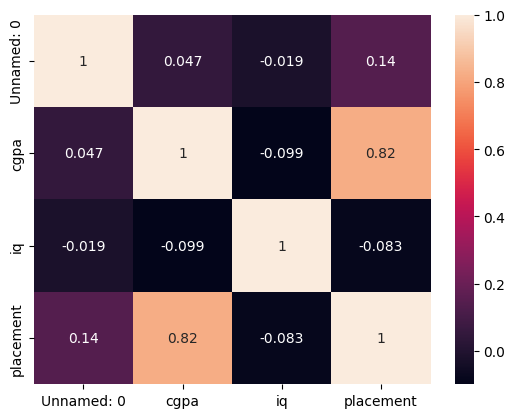

In [ ]:
sns.heatmap(corr,annot=True)

In [ ]:
# Define a simple cost function (mean squared error)
def cost_function(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

In [ ]:
# Define a function to compute gradients
def compute_gradients(X, y_pred, y_true):
    # Number of data points
    m = len(y_true)

    # Compute the error
    error = y_pred - y_true

    # Compute gradients
    grad_a0 = np.mean(error)
    grad_a1 = np.mean(error * X)

    return grad_a0, grad_a1


In [ ]:
# Initialize parameters
a0 = 0.0
a1 = 1.0
learning_rate = 0.01
epochs = 1000

In [ ]:
# Gradient Descent
for epoch in range(epochs):
    # Predictions
    y_pred = a0 + a1 * X_scaled

    # Compute the cost
    cost = cost_function(y_pred, y)

    # Compute gradients
    grad_a0, grad_a1 = compute_gradients(X_scaled, y_pred, y)

    # Update parameters
    a0 -= learning_rate * grad_a0
    a1 -= learning_rate * grad_a1

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Cost = {cost}")

print("Final Parameters:")
print("Intercept (a0):", a0)
print("Slope (a1):", a1)


Epoch 0: Cost = 16852.6
Epoch 100: Cost = 3625.85737137232
Epoch 200: Cost = 1853.74269455884
Epoch 300: Cost = 1616.3153463483463
Epoch 400: Cost = 1584.5049074327167
Epoch 500: Cost = 1580.2429551697114
Epoch 600: Cost = 1579.6719401912537
Epoch 700: Cost = 1579.595435790101
Epoch 800: Cost = 1579.5851857553096
Epoch 900: Cost = 1579.583812458981
Final Parameters:
Intercept (a0): 123.57466489724501
Slope (a1): 4.3171247410595914e-05


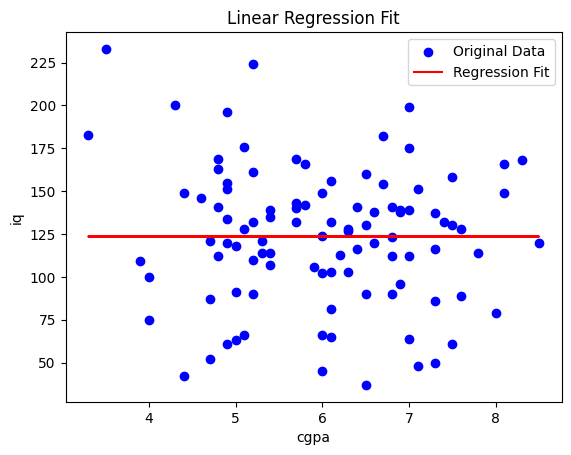

In [ ]:
# Plot the original data points
plt.scatter(X, y, color='blue', label='Original Data')

# Plot the regression line
plt.plot(X, a0 + a1 * X, color='red', label='Regression Fit')

# Add labels and title
plt.xlabel('cgpa')
plt.ylabel('iq')
plt.title('Linear Regression Fit')
plt.legend()

# Show plot
plt.show()